This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('Train_.csv')
df_test = pd.read_csv('Test_.csv')
submission = pd.read_csv('Sample_Submission_.csv')

In [3]:
df_train.shape

(18288, 3)

In [4]:
df_train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
df_train.nunique()

ID          18288
Datetime    18288
Count         437
dtype: int64

In [6]:
df_test.shape

(5112, 2)

In [7]:
df_test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [8]:
submission.head()

,ID,Count


In [9]:
df_train.drop('ID', axis=1, inplace=True)

In [10]:
df_train.Datetime = pd.to_datetime(df_train.Datetime)
df_train.index = df_train.Datetime
df_train.drop('Datetime', axis=1, inplace=True)

In [11]:
df_test.Datetime = pd.to_datetime(df_test.Datetime)
df_test.index = df_test.Datetime
df_test.drop('Datetime', axis=1, inplace=True)

In [12]:
df_train.isnull().sum()

Count    0
dtype: int64

In [13]:
df_test.isnull().sum()

ID    0
dtype: int64

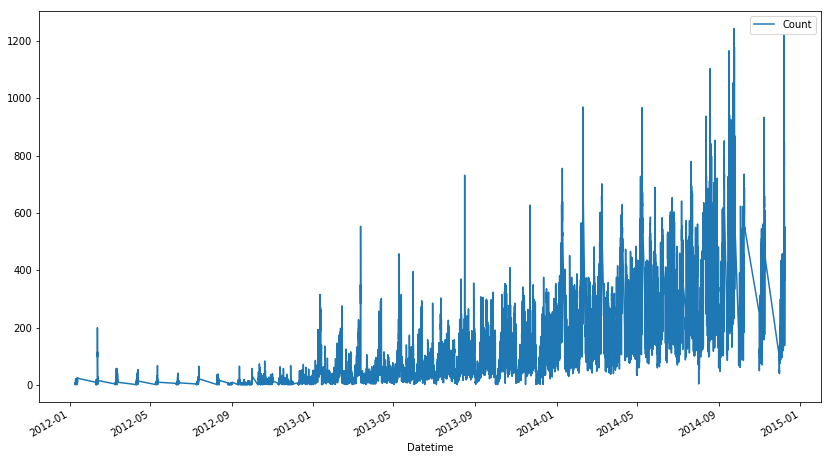

In [28]:
df_train.plot(figsize=(14, 8))
plt.show()

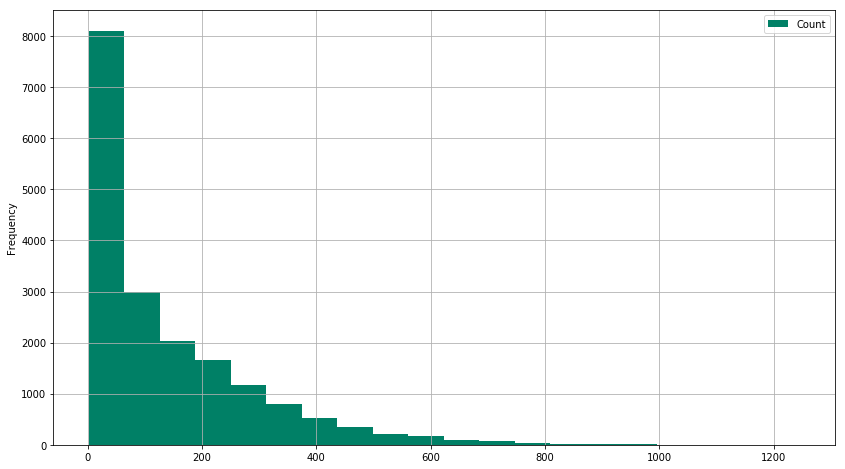

In [33]:
df_train.plot(kind='hist', bins=20, colormap='summer', grid=True, figsize=(14, 8))
plt.show()

In [14]:
df_train['pct_change1'] = df_train.pct_change().mul(100)

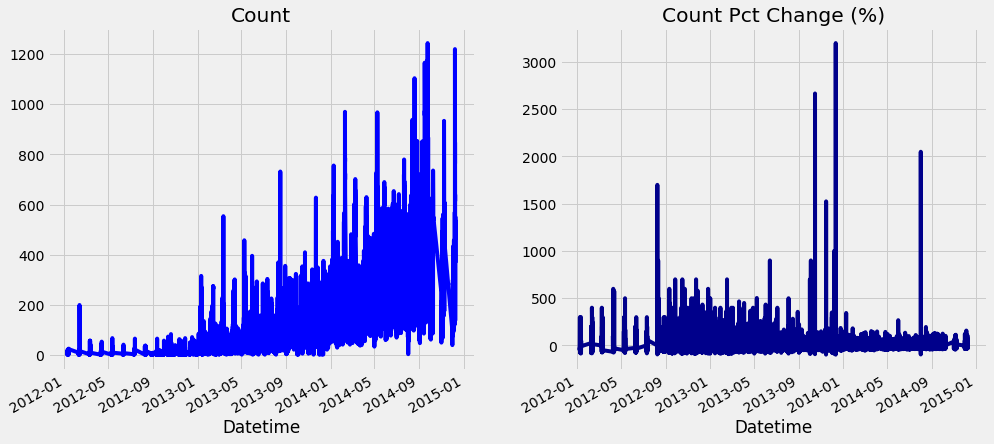

In [53]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
ax1 = df_train.Count.plot(ax=axs[0], color='Blue')
ax1.set_title('Count')
ax2 = df_train.pct_change1.plot(ax=axs[1], color='DarkBlue')
ax2.set_title('Count Pct Change (%)')
plt.show()

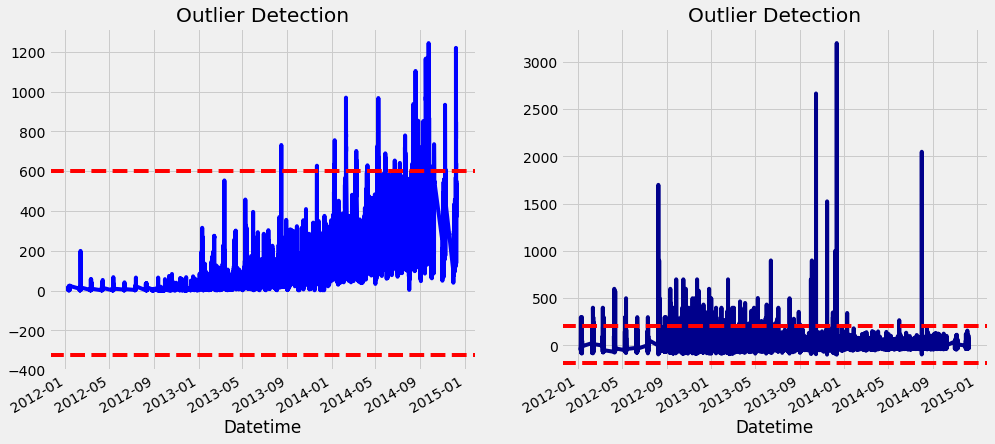

In [57]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

for data, ax, c in zip([df_train.Count, df_train.pct_change1], axs, ['Blue', 'DarkBlue']) :
    mean = data.mean()
    std = data.std()
    
    ax = data.plot(ax=ax, color=c)
    ax.axhline(mean+3*std, ls='--', c='r')
    ax.axhline(mean-3*std, ls='--', c='r')
    ax.set_title('Outlier Detection')
    
plt.show()

In [15]:
# check how many the outlier

def count_outlier(data):
    data_center = data - data.mean()
    data_std = data.std()
    
    data_outlier = data_center[data_center>3*data_std]
    index_outlier = data_outlier.index
    count = len(data_outlier)
    return count, index_outlier

In [16]:
data_outlier1, index_outlier1 = count_outlier(df_train.Count)
data_outlier2, index_outlier2 = count_outlier(df_train.pct_change1)

In [17]:
print("Outlier in raw data {}".format(data_outlier1))

Outlier in raw data 313


In [18]:
print("Outlier in pct_change data {}".format(data_outlier2))

Outlier in pct_change data 175


In [19]:
feature_over_time = df_train.Count.rolling(24).agg(['mean', 'max', 'min', 'std'])

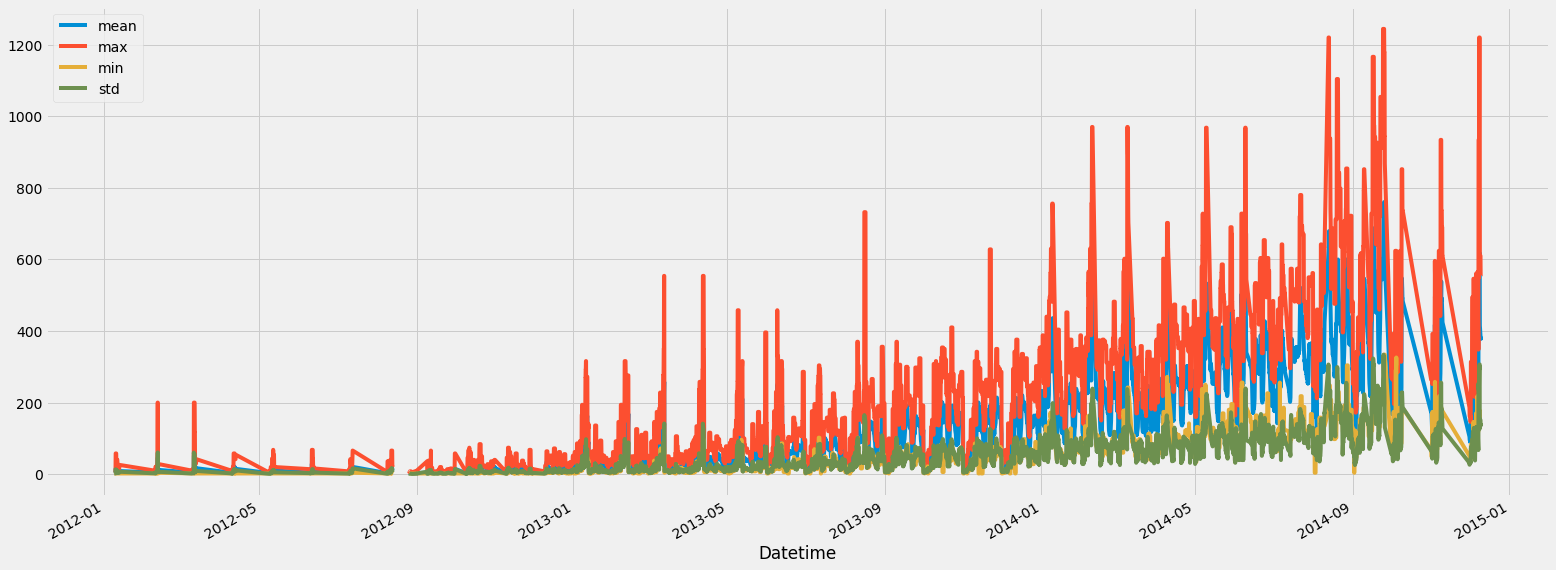

In [75]:
feature_over_time.plot(figsize=(24, 10))
plt.show()

In [20]:
df_train['year'] = df_train.index.year
df_train['month'] = df_train.index.month
df_train['hour'] = df_train.index.hour
df_train['day'] = df_train.index.day_name()
df_train['quarter'] = df_train.index.quarter

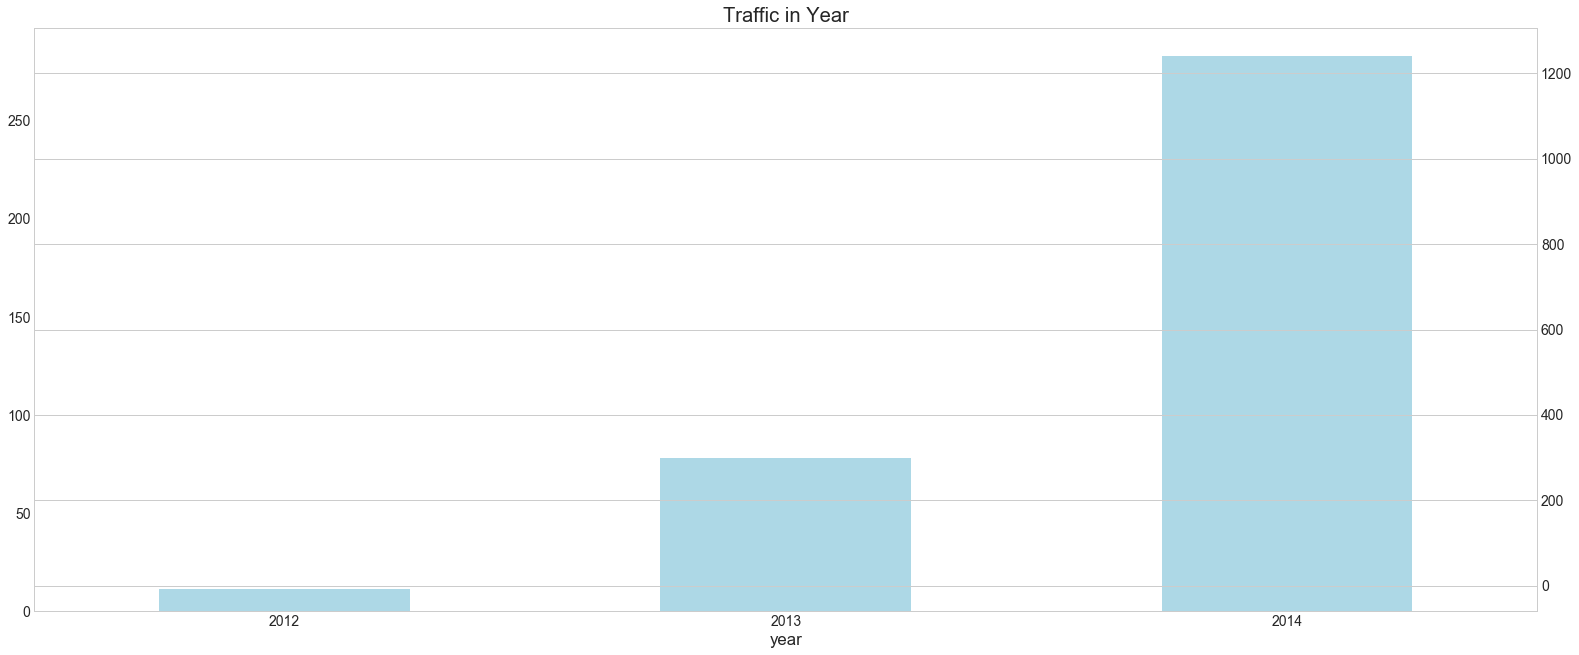

In [129]:
plt.style.use('seaborn-whitegrid')
df_train.groupby('year')['Count'].mean().plot(kind='bar', figsize=(24, 10), color='lightblue', edgecolor='none')
plt.title('Traffic in Year')
plt.xlabel('Year')
plt.show()

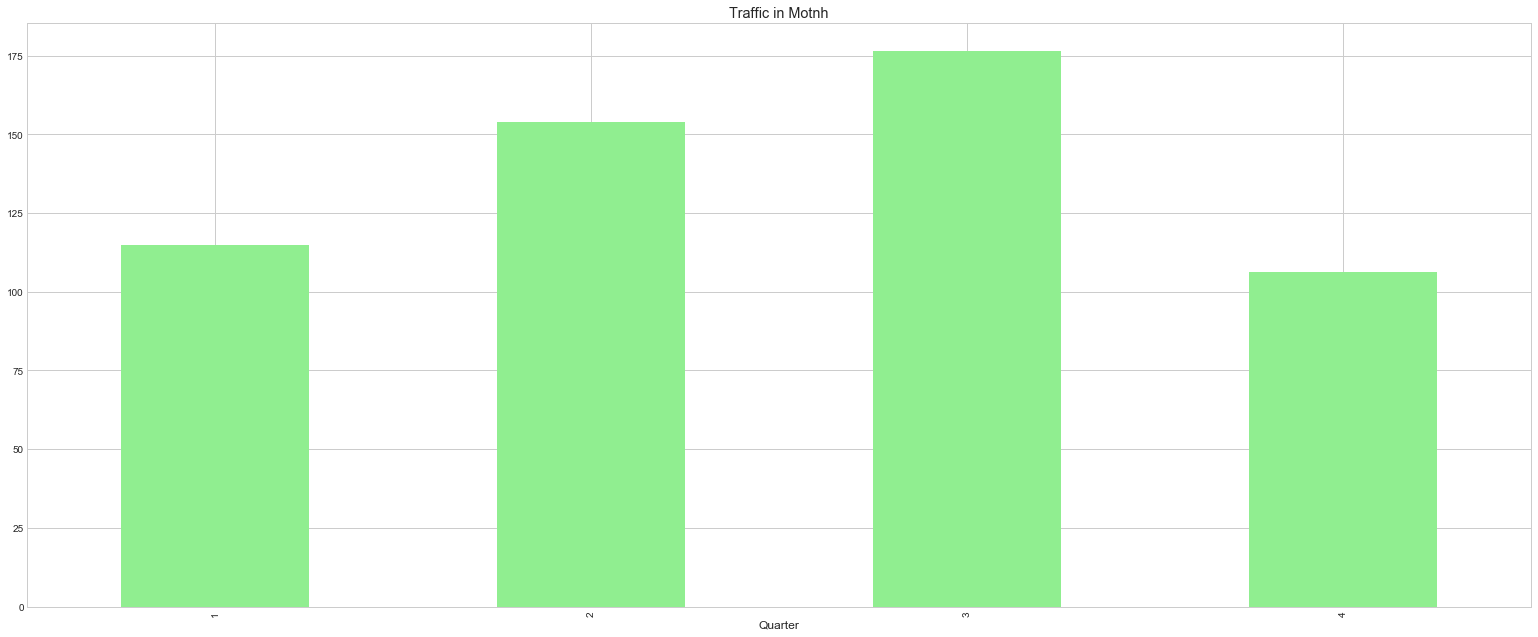

In [190]:
plt.style.use('seaborn-whitegrid')
df_train.groupby('quarter')['Count'].mean().plot(kind='bar', figsize=(24, 10), color='lightgreen')
plt.title('Traffic in Motnh')
plt.xlabel('Quarter')
plt.show()

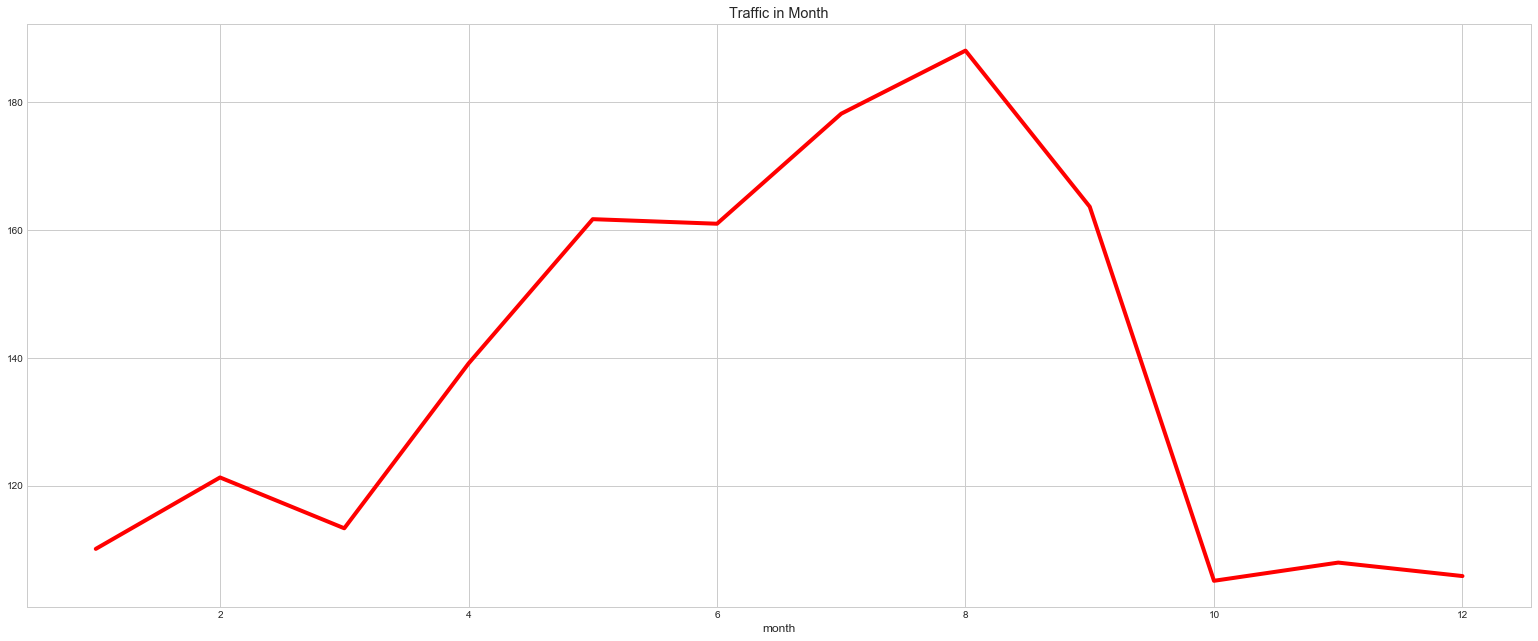

In [195]:
plt.style.use('seaborn-whitegrid')
df_train.groupby('month')['Count'].mean().plot(kind='line', figsize=(24, 10), color='red')
plt.title('Traffic in Month')
plt.xlabel('month')
plt.show()

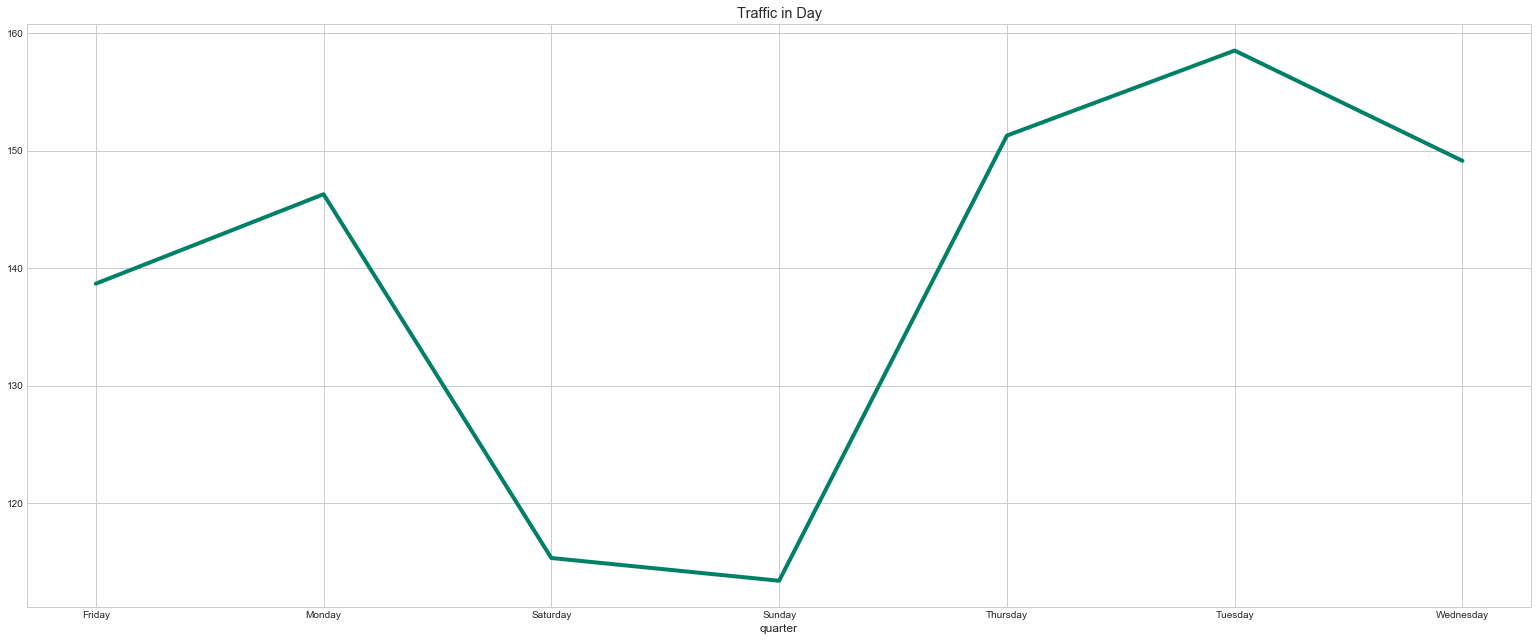

In [196]:
df_train.groupby('day')['Count'].mean().plot(kind='line', figsize=(24, 10),colormap='summer')
plt.title('Traffic in Day')
plt.xticks(np.arange(len(df_train.groupby('day')['Count'].mean().index)), df_train.groupby('day')['Count'].mean().index)
plt.xlabel('quarter')
plt.show()

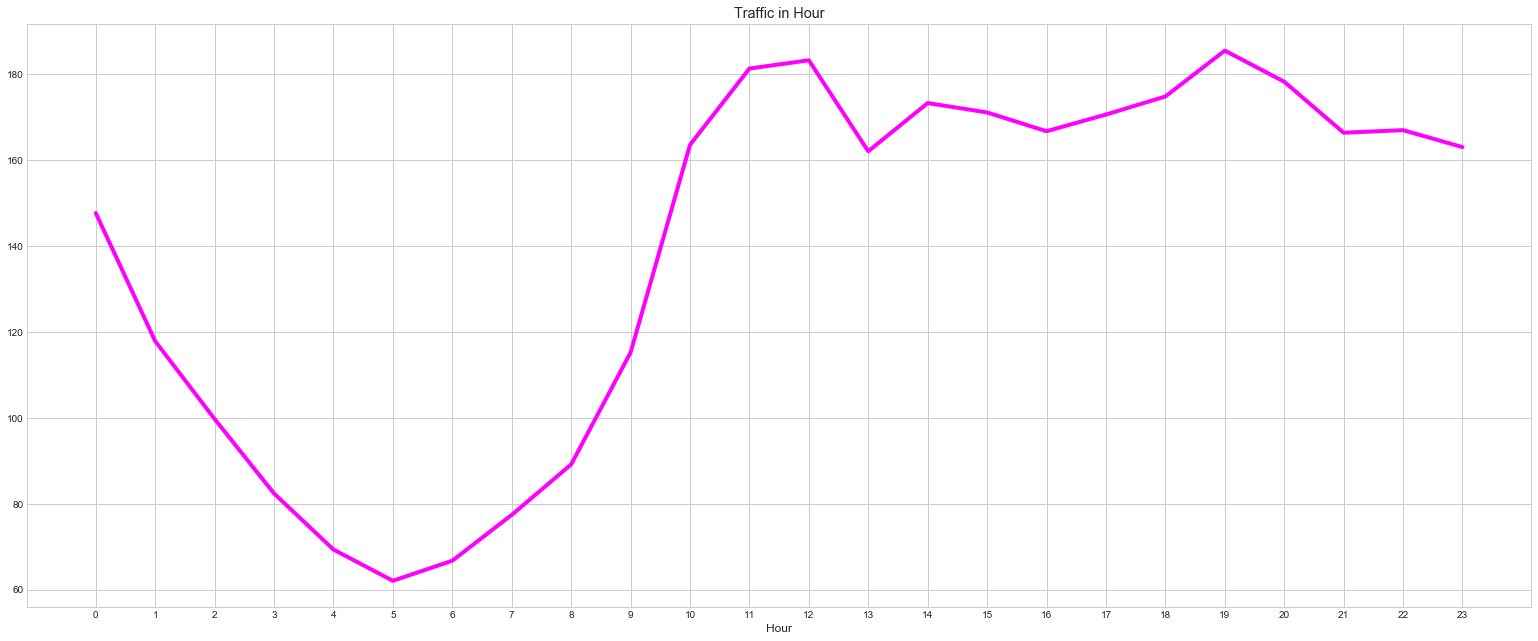

In [202]:
df_train.groupby('hour')['Count'].mean().plot(kind='line', figsize=(24, 10), colormap='spring')
plt.title('Traffic in Hour')
plt.xticks(np.arange(len(df_train.groupby('hour')['Count'].mean().index)), df_train.groupby('hour')['Count'].mean().index)
plt.xlabel('Hour')
plt.show()

In [21]:
import holidays

df_train['National_Holidays'] = 'no'
df_train['Name_Holidays'] = 'none'

for date, name in holidays.US(years=[2012, 2013, 2014]).items() :
    if date in df_train.index :
        df_train['National_Holidays'][date] = 'yes'
        df_train['Name_Holidays'][date] = name

C:\Users\Data Scientist\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Data Scientist\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


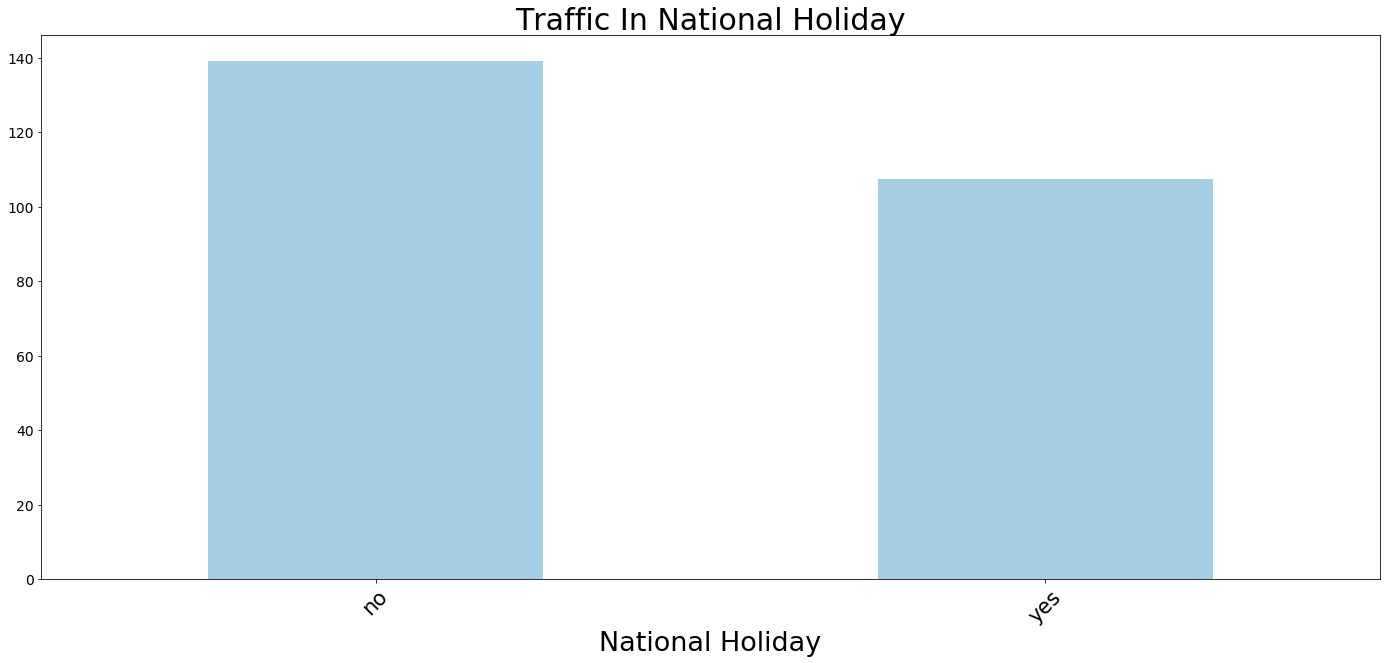

In [22]:
df_train.groupby('National_Holidays')['Count'].mean().plot(kind='bar', figsize=(24, 10), colormap='Paired')
plt.title('Traffic In National Holiday', fontsize=30)
plt.xticks(fontsize=21, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('National Holiday', fontsize=27)
plt.show()

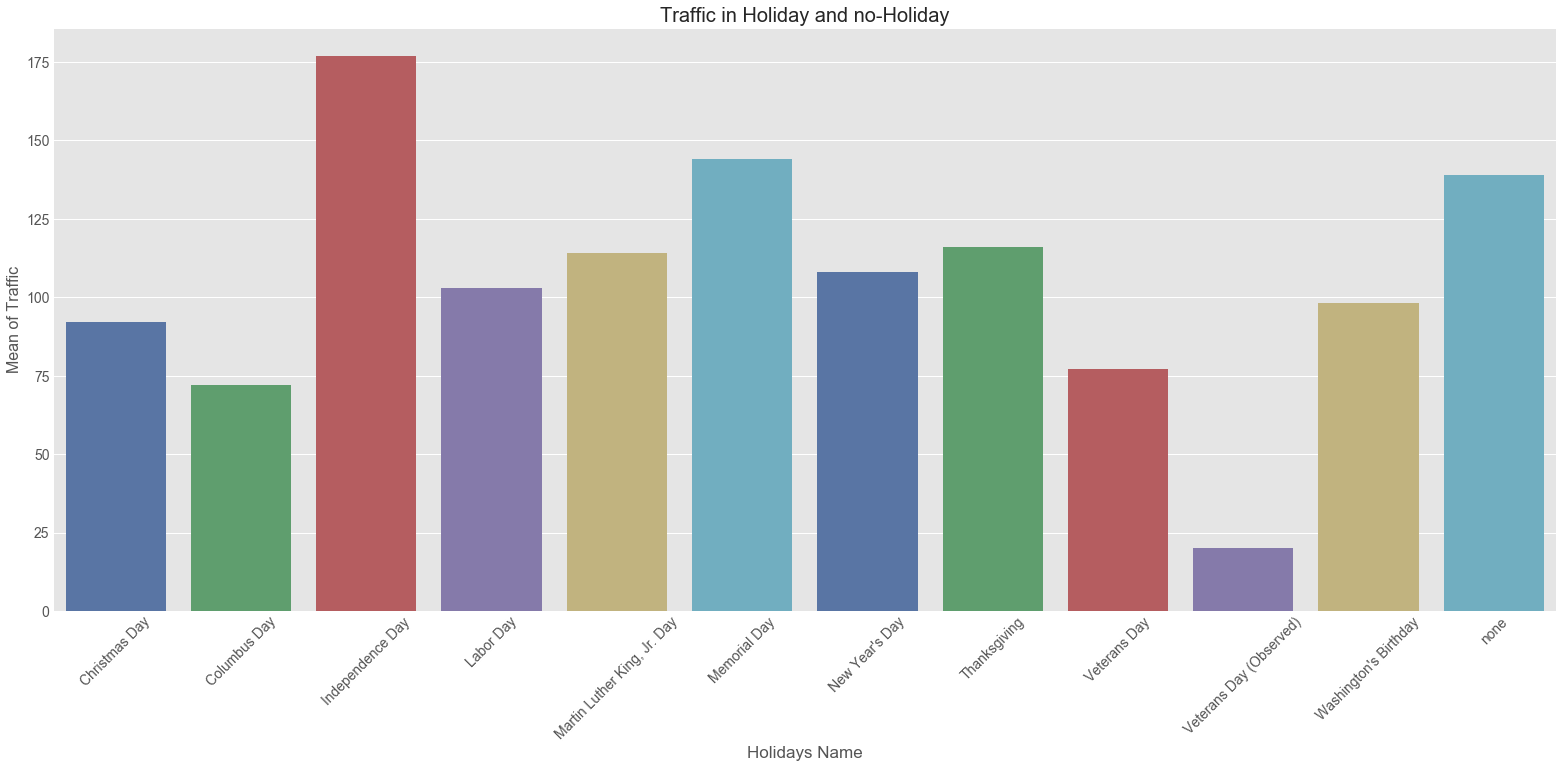

In [239]:
group_holiday = df_train.groupby('Name_Holidays')['Count'].mean()
plt.figure(figsize=(24, 10))
sns.barplot(group_holiday.index, group_holiday, palette='deep')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Holidays Name', fontsize=17)
plt.ylabel('Mean of Traffic', fontsize=16)
plt.title('Traffic in Holiday and no-Holiday', fontsize=20)
plt.show()

In [23]:
df_train.columns

Index(['Count', 'pct_change1', 'year', 'month', 'hour', 'day', 'quarter',
       'National_Holidays', 'Name_Holidays'],
      dtype='object')

In [24]:
shifts = np.arange(1, 12)

for shift in shifts :
    df_train['count_shift_{}'.format(shift)] = df_train.Count.shift(shift)

In [25]:
df_train = pd.concat([df_train, feature_over_time], axis=1)

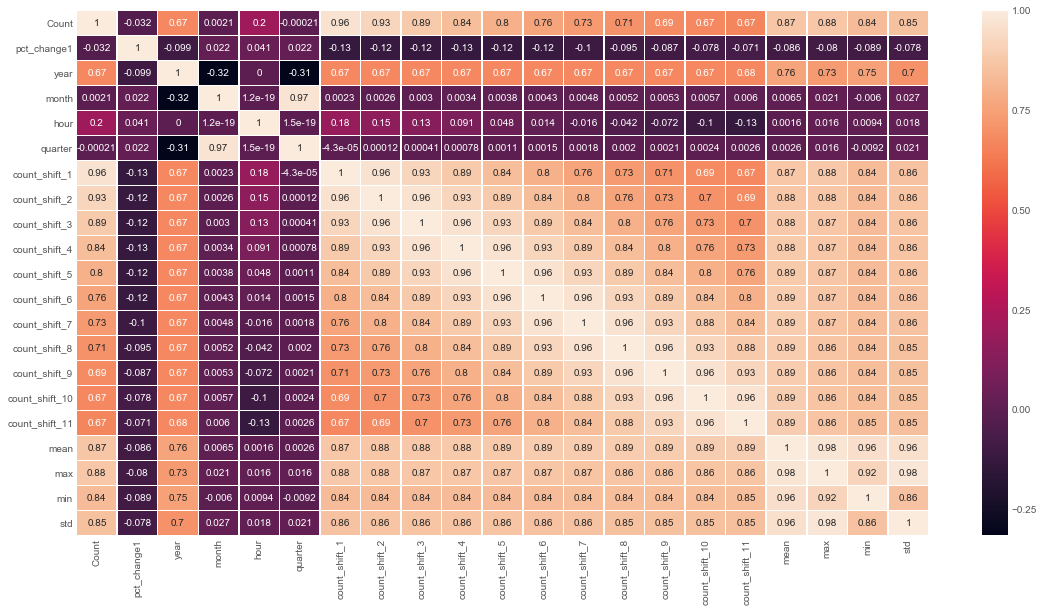

In [263]:
plt.figure(figsize=(17, 9))
sns.heatmap(df_train.corr(), annot=True, linewidth=0.5)
plt.show()

In [26]:
col_drop =list(df_train.columns[-14:])

In [27]:
col_drop = col_drop + ['quarter']

In [28]:
df_train.drop(col_drop, axis=1, inplace=True)

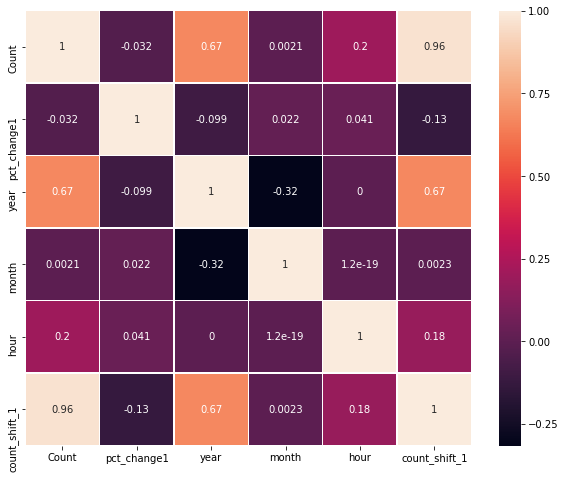

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, linewidth=0.5)
plt.show()

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 9 columns):
Count                18288 non-null int64
pct_change1          18287 non-null float64
year                 18288 non-null int64
month                18288 non-null int64
hour                 18288 non-null int64
day                  18288 non-null object
National_Holidays    18288 non-null object
Name_Holidays        18288 non-null object
count_shift_1        18287 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.0+ MB


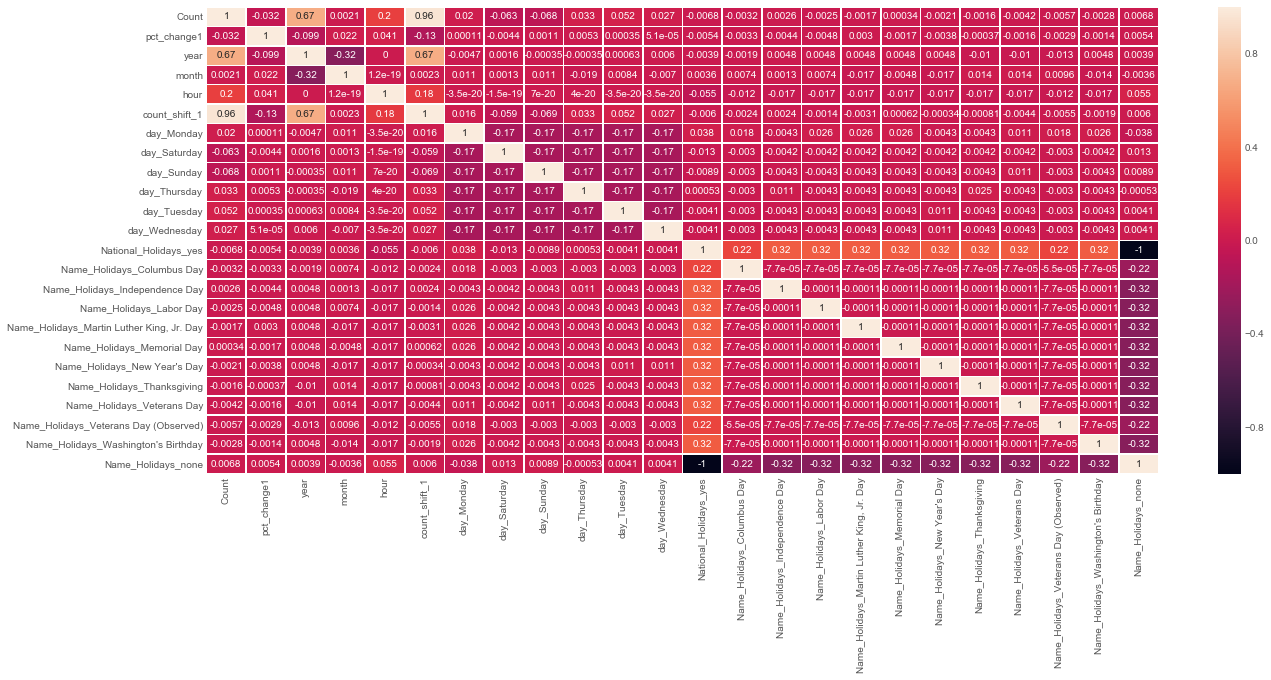

In [276]:
plt.figure(figsize=(19, 8))
sns.heatmap(pd.get_dummies(df_train, drop_first=True).corr(), annot=True, linewidth=0.5)
plt.show()

In [31]:
col_drop2 = ['National_Holidays']

In [32]:
df_train.drop(col_drop2, axis=1, inplace=True)

In [35]:
df_train.head()

,Count,pct_change1,year,month,hour,day,Name_Holidays,count_shift_1
Datetime,,,,,,,,
2012-08-25 00:00:00,8,NaN,2012,8,0,Saturday,none,NaN
2012-08-25 01:00:00,2,-75.000000,2012,8,1,Saturday,none,8.0
2012-08-25 02:00:00,6,200.000000,2012,8,2,Saturday,none,2.0
2012-08-25 03:00:00,2,-66.666667,2012,8,3,Saturday,none,6.0
2012-08-25 04:00:00,2,0.000000,2012,8,4,Saturday,none,2.0


In [41]:
from sklearn.model_selection import TimeSereisSplit

feature1 = df_train.columns[2:-1]
feature2 = df_train.columns[1:]
target = df_train.Count

x1 = pd.get_dummies(df_train[feature1])
x2 = pd.get_dummies(df_train[feature2])



In [ ]:
from sklearn.model_selection import TimeSereisSplit

In [ ]:
from sklearn.model_selection import GridSearchCV

def training(model, x, y) :
    
    
    
    return 